In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [608]:
df_train =pd.read_csv("train.csv")

In [609]:
df_test = pd.read_csv("test.csv")

In [610]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [611]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [612]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [613]:
df_train.describe(include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [614]:
df_train.describe(include = [np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hassab, Mr. Hammad",male,1601,B96 B98,S
freq,1,577,7,4,644


In [615]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [616]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [617]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

<h1>Cleaning process</h1>

<h2>Dealing with null values</h2>

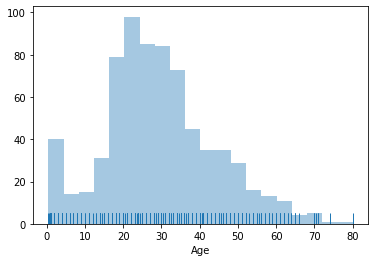

In [618]:
sns.distplot(df_train['Age'], kde = False, rug = True)

In [619]:
print(df_train['Age'].mean())
print(df_train['Age'].mode()[0])

29.69911764705882
24.0


In [620]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [621]:
print(df_train['Cabin'].mode())

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object


In [622]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [623]:
print(df_train['Embarked'].mode())

0    S
dtype: object


Since, we can observe that AGE,Embarked,Cabin have few numbers of missing values so we will try to used mean and mode imputation techniques to fillna values,.

In [624]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)

In [625]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

In [626]:
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0],inplace = True)

In [627]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [628]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [629]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace = True)

In [630]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [631]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)

In [632]:
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0], inplace = True)

In [633]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [634]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [635]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [636]:
df_train.drop(columns='Ticket', inplace = True)

In [637]:
df_test.drop(columns = 'Ticket', inplace = True)

<h1>Check for feature slection playing important role in label</h1>

In [638]:
df_feat = df_train

In [639]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [640]:
df_feat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,B96 B98,S


In [641]:
df_feat.drop(columns='Name', inplace = True)

In [642]:
df_columns = df_feat.columns

<h1>Exploratory Data Analysis</h1>

In [643]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


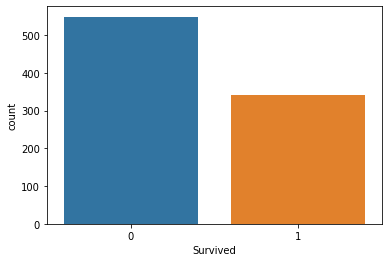

In [644]:
sns.countplot(x="Survived",data = df_train)

<h2>Convverting the Object into Number using OrdinalEncoder to check which feature plays an important role in predicting the label</h2>

In [645]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [646]:
enc.fit(df_feat)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [647]:
enc.categories_

[array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [648]:
df_ord = enc.transform(df_feat)

In [649]:
df_ord = pd.DataFrame(df_ord)

In [650]:
df_ord.columns = df_columns

In [651]:
df_ord.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,0.0,2.0,1.0,28.0,1.0,0.0,18.0,47.0,2.0
1,1.0,1.0,0.0,0.0,52.0,1.0,0.0,207.0,81.0,0.0
2,2.0,1.0,2.0,0.0,34.0,0.0,0.0,41.0,47.0,2.0
3,3.0,1.0,0.0,0.0,48.0,1.0,0.0,189.0,55.0,2.0
4,4.0,0.0,2.0,1.0,48.0,0.0,0.0,43.0,47.0,2.0


<h2>Ordinal Encoder done</h2>

<h2>Extra Tree CLassifier to identify the key importance of features over the label</h2>

In [652]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [653]:
df_ord.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,0.0,2.0,1.0,28.0,1.0,0.0,18.0,47.0,2.0
1,1.0,1.0,0.0,0.0,52.0,1.0,0.0,207.0,81.0,0.0
2,2.0,1.0,2.0,0.0,34.0,0.0,0.0,41.0,47.0,2.0
3,3.0,1.0,0.0,0.0,48.0,1.0,0.0,189.0,55.0,2.0
4,4.0,0.0,2.0,1.0,48.0,0.0,0.0,43.0,47.0,2.0


In [654]:
y =df_ord['Survived']

In [655]:
df_ord.drop(columns= ['Survived','PassengerId'], inplace = True)

In [656]:
df_ord.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2.0,1.0,28.0,1.0,0.0,18.0,47.0,2.0
1,0.0,0.0,52.0,1.0,0.0,207.0,81.0,0.0
2,2.0,0.0,34.0,0.0,0.0,41.0,47.0,2.0
3,0.0,0.0,48.0,1.0,0.0,189.0,55.0,2.0
4,2.0,1.0,48.0,0.0,0.0,43.0,47.0,2.0


In [657]:
model.fit(df_ord,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [658]:
print(model.feature_importances_)

[0.0943292  0.27411236 0.22453156 0.04634271 0.04455931 0.21347262
 0.0690413  0.03361094]


In [659]:
feat_importances = pd.Series(model.feature_importances_, index=df_ord.columns)

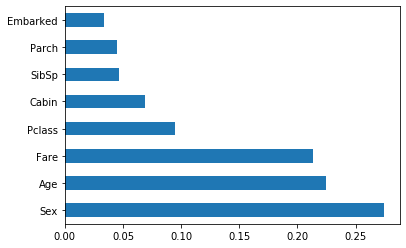

In [660]:
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


<h1>Univariant Selection</h1>

In [661]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [662]:
bestfeature = SelectKBest(score_func=chi2, k = 8)

In [663]:
fit = bestfeature.fit(df_ord,y)

In [664]:
dfscores = pd.DataFrame(fit.scores_)

In [665]:
print(dfscores)

             0
0    54.465866
1    92.702447
2    24.710384
3     1.236040
4    10.097499
5  4626.963717
6   284.482789
7    10.202525


In [666]:
dfcolumns = pd.DataFrame(df_ord.columns)

In [667]:
dfcolumns

,0
0,Pclass
1,Sex
2,Age
3,SibSp
4,Parch
5,Fare
6,Cabin
7,Embarked


In [668]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [669]:
featureScores

,0,0
0,Pclass,54.465866
1,Sex,92.702447
2,Age,24.710384
3,SibSp,1.236040
4,Parch,10.097499
5,Fare,4626.963717
6,Cabin,284.482789
7,Embarked,10.202525


<h2>The above graph specifies the important features that can be considered to increase the accuracy while training the machine learning model. From the above graph we can identify top 5 feature whihc can increse the rate of prediction that are SEX, Ticket,Age,Fare, PassengerID and the least important Embarked and PArch</h2>

<h2>Since we are done with Identify the Important Features to be feeded into our machine learning model. So, lets check the train and test data once before performing the one-hot encoding</h2>

In [670]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex

In [671]:
df_train.corrwith(df_train['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

<h1>Remove less important feature from training and test dataset</h1>

In [672]:
df_train.drop(columns = ['Parch','SibSp'],inplace =True)

In [673]:
df_test.drop(columns=['Parch','SibSp','Name'], inplace = True)

In [674]:
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    object 
 7   Embarked     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin

In [675]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [676]:
df_train.Cabin.unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [677]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    object 
 6   Embarked     418 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 23.0+ KB


In [678]:
df_test.Sex.unique()

array(['male', 'female'], dtype=object)

In [679]:
df_test.Cabin.unique()

array(['B57 B59 B63 B66', 'B45', 'E31', 'B36', 'A21', 'C78', 'D34', 'D19',
       'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53', 'D43',
       'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2',
       'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105'], dtype=object)

<h2>Cabin can be dropped from both test and train data</h2>

In [680]:
df_train.drop(columns='Cabin', inplace = True)
df_test.drop(columns= 'Cabin', inplace = True)

In [681]:
df_train.drop(columns = 'Fare',inplace = True)
df_test.drop(columns = "Fare", inplace = True)

In [682]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Embarked     891 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Embarked     418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB
None


<h1>Perform ONe Hot Encoding for Train and test data</h1>

In [459]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Embarked     891 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [460]:
y = df_train['Survived']

In [461]:
df_train.drop(columns = ['Survived','PassengerId'], inplace = True)

In [462]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [463]:
df_train.head()

,Pclass,Sex,Age,Embarked
0,3,male,22.0,S
1,1,female,38.0,C
2,3,female,26.0,S
3,1,female,35.0,S
4,3,male,35.0,S


In [464]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Embarked     418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [465]:
PssengerID = df_test['PassengerId']

In [466]:
df_test.drop(columns = 'PassengerId', inplace = True)

In [467]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.2+ KB


In [468]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [469]:
df_train = pd.get_dummies(df_train, prefix=['Sex','Embarked'],drop_first= True)

In [470]:
df_test = pd.get_dummies(df_test, prefix=['Sex','Embarked'], drop_first= True)

In [471]:
df_test.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,1,1,0
1,3,47.0,0,0,1
2,2,62.0,1,1,0
3,3,27.0,1,0,1
4,3,22.0,0,0,1


In [472]:
df_train.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1
1,1,38.0,0,0,0
2,3,26.0,0,0,1
3,1,35.0,0,0,1
4,3,35.0,1,0,1


<h2>Done with One hot encodeing</h2>

<h1>Entering into the den of Machine Learning</h1>

<h2>Train Test And Split</h2>

In [473]:
from sklearn.model_selection import train_test_split

In [474]:
X_train,X_test,y_train,y_test = train_test_split(df_train,y,test_size = 0.3,random_state = 0)

In [475]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 5)
(268, 5)
(623,)
(268,)


<h2>Done with train test Split</h2>

In [476]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [477]:
model = LogisticRegression(solver='liblinear', C = 10,random_state=0)
model.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [478]:
y_pred = model.predict(X_test)

In [479]:
accuracy_score(y_test,y_pred)

0.7947761194029851

In [480]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       168
           1       0.72      0.74      0.73       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



In [481]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[139,  29],
       [ 26,  74]], dtype=int64)

In [482]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

<h2>Decision Tree Classifier</h2>

In [483]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
depths = range(1,25)
cv_scores1= []
for maxdepth in depths:
    dt = DecisionTreeClassifier(max_depth = maxdepth,random_state = 0)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores1.append(scores.mean())


In [484]:
maxdepth_best= depths[np.argmax(cv_scores1)]
print(cv_scores1)
print(maxdepth_best)

[0.786584741423451, 0.7640296979006657, 0.8233230926779314, 0.8232974910394265, 0.8104198668714797, 0.802432155657962, 0.8153609831029185, 0.8088581669226832, 0.8136456733230928, 0.8137224782386072, 0.8088581669226832, 0.8104966717869944, 0.8104966717869944, 0.8120839733742959, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944]
3


<h2>Random Forest Classifier</h2>

In [485]:
from sklearn.ensemble import RandomForestClassifier
depths_1 = range(1,25)
cv_scores1=[]
for maxdepth in depths:
    rfc = RandomForestClassifier(max_depth=maxdepth,random_state=0)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores1.append(scores.mean())    

In [486]:
maxdepth_best= depths[np.argmax(cv_scores1)]
print(cv_scores1)
print(maxdepth_best)

[0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944, 0.8104966717869944]
1


<h2>XGBoost </h2>

In [487]:
import xgboost as xgb

In [488]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10,feature_selector = "greedy")

In [489]:
xg_reg.fit(X_train,y_train)

[13:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { feature_selector } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              feature_selector='greedy', gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [490]:
preds = xg_reg.predict(X_test)

In [491]:
accuracy_score(y_test, preds)

0.7985074626865671

<h2>Predicting on Testing Data using decision Tree Model</h2>

In [492]:
df_test.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,1,1,0
1,3,47.0,0,0,1
2,2,62.0,1,1,0
3,3,27.0,1,0,1
4,3,22.0,0,0,1


In [493]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   Sex_male    418 non-null    uint8  
 3   Embarked_Q  418 non-null    uint8  
 4   Embarked_S  418 non-null    uint8  
dtypes: float64(1), int64(1), uint8(3)
memory usage: 7.9 KB


In [546]:
dt = DecisionTreeClassifier(max_depth = 3,random_state = 0)

In [547]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [548]:
y_pred = dt.predict(X_test)

In [549]:
t_pred = dt.predict(df_test)

In [550]:
accuracy_score(y_test,y_pred)

0.8097014925373134

In [551]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   Sex_male    418 non-null    uint8  
 3   Embarked_Q  418 non-null    uint8  
 4   Embarked_S  418 non-null    uint8  
dtypes: float64(1), int64(1), uint8(3)
memory usage: 7.9 KB


In [552]:
df1 = pd.read_csv('test.csv')

In [553]:
df1.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [554]:
df_pred1 = pd.DataFrame(df1['PassengerId'])

In [555]:
df_pred1['Survived'] = t_pred

In [556]:
df_pred1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [557]:
df_pred1.to_csv('Prediction.csv', index= False)

In [510]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [511]:
df1[['PassengerId','Sex']]

,PassengerId,Sex
0,892,male
1,893,female
2,894,male
3,895,male
4,896,female
...,...,...
413,1305,male
414,1306,female
415,1307,male
416,1308,male


In [513]:
df_ana = df_pred1.merge(df1, on = 'PassengerId',how = 'inner')

In [514]:
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [515]:
df_ana.drop(columns = ['Pclass','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Name'], inplace = True)

In [516]:
df_anab

,PassengerId,Survived,Sex
0,892,0,male
1,893,0,female
2,894,0,male
3,895,0,male
4,896,0,female
...,...,...,...
413,1305,0,male
414,1306,1,female
415,1307,0,male
416,1308,0,male


In [523]:
df_ana.Sex.unique()

array(['male', 'female'], dtype=object)

In [530]:
df_ana.to_csv('Submission.csv')

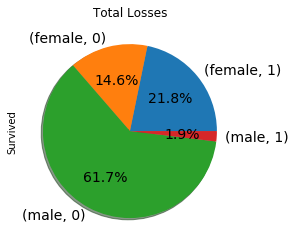

In [529]:
df_ana.groupby(['Sex'])['Survived'].value_counts().plot(kind = "pie",
                                            autopct='%1.1f%%',title = "Total Losses",shadow = True,legend = False, fontsize = 14)

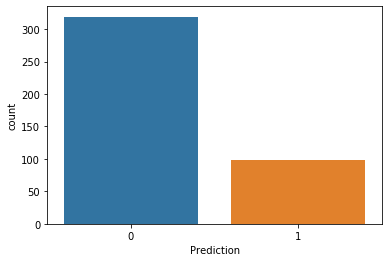

In [142]:
sns.countplot(x = "Prediction", data = df_pred)